<a href="https://colab.research.google.com/github/rezaul61/Breast-Cancer-Prediction/blob/main/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/breast_cancer.csv')

In [ ]:
data.drop(['Sample code number'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0
Class,0


In [ ]:
x=data.iloc[:,:-1]

In [ ]:
y=data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
linear_model=LogisticRegression(random_state=0).fit(x_train,y_train)

In [ ]:
predicted_y=linear_model.predict(x_test)

In [ ]:
pd.DataFrame(predicted_y)

,0
0,2
1,2
2,4
3,4
4,2
...,...
132,4
133,2
134,2
135,4


In [ ]:
y_test

,Class
113,2
378,2
303,4
504,4
301,2
...,...
21,4
454,2
506,2
500,4


In [ ]:
linear_model.score(x_test,y_test)

0.9562043795620438

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_y)

In [ ]:
import seaborn as sns

<Axes: >

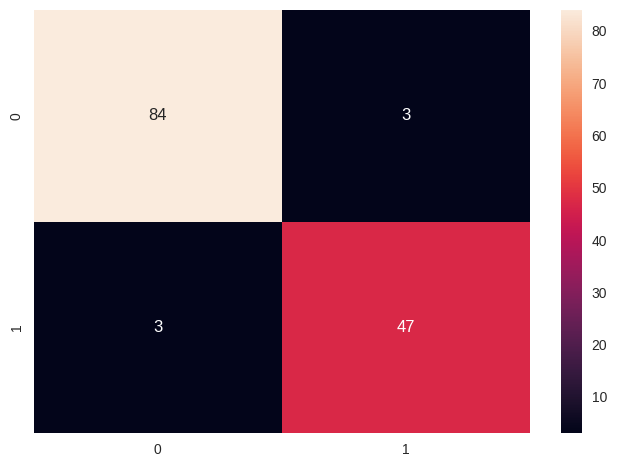

In [ ]:
sns.heatmap(cm, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=True, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)

In [ ]:
from pycaret.regression import *

In [ ]:
model=setup(data,target="Class",numeric_imputation="median",log_experiment=False,remove_multicollinearity=True,
            transformation=True,normalize=True,train_size=0.8,)

,Description,Value
0,Session id,5148
1,Target,Class
2,Target type,Regression
3,Original data shape,"(683, 10)"
4,Transformed data shape,"(683, 9)"
5,Transformed train set shape,"(546, 9)"
6,Transformed test set shape,"(137, 9)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.0804,0.0947,0.2784,0.8925,0.0688,0.0298,0.0980
et,Extra Trees Regressor,0.0991,0.0961,0.2923,0.8912,0.0737,0.0356,0.1490
rf,Random Forest Regressor,0.1016,0.0960,0.2916,0.8909,0.0734,0.0368,0.1890
lightgbm,Light Gradient Boosting Machine,0.1497,0.1088,0.3173,0.8766,0.0802,0.0538,0.4400
gbr,Gradient Boosting Regressor,0.1317,0.1159,0.3265,0.8684,0.0820,0.0474,0.1120
ada,AdaBoost Regressor,0.2074,0.1293,0.3501,0.8545,0.0909,0.0822,0.1120
br,Bayesian Ridge,0.2447,0.1302,0.3536,0.8537,0.0939,0.0971,0.0490
lar,Least Angle Regression,0.2447,0.1303,0.3537,0.8535,0.0940,0.0972,0.0510
lr,Linear Regression,0.2447,0.1303,0.3537,0.8535,0.0940,0.0972,0.7600
ridge,Ridge Regression,0.2447,0.1303,0.3537,0.8535,0.0940,0.0972,0.0490


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])


In [ ]:
knn=create_model("knn")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0509,0.0262,0.1618,0.9693,0.0344,0.0127
1,0.1018,0.1455,0.3814,0.8392,0.0964,0.0418
2,0.1600,0.2036,0.4513,0.7433,0.1165,0.0655
3,0.1527,0.2240,0.4733,0.7456,0.1255,0.0636
4,0.0873,0.1105,0.3325,0.8885,0.0808,0.0309
5,0.0364,0.0145,0.1206,0.9852,0.0251,0.0091
6,0.0667,0.0622,0.2494,0.9356,0.0555,0.0167
7,0.0815,0.0681,0.2611,0.9210,0.0684,0.0315
8,0.0593,0.0889,0.2981,0.9000,0.0743,0.0241


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
save_model(knn, 'K_Neighbors_Regressor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Clump Thickness',
                                              'Uniformity of Cell Size',
                                              'Uniformity of Cell Shape',
                                              'Marginal Adhesion',
                                              'Single Epithelial Cell Size',
                                              'Bare Nuclei', 'Bland Chromatin',
                                              'Normal Nucleoli', 'Mitoses'],
                                     transformer=SimpleImputer(strategy='median'))),
                 ('categorical_imputer',
                  TransformerWrapper...
                  TransformerWrapper(exclude=[],
                                     transformer=RemoveMulticollinearity(threshold=0.9))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(

In [ ]:
from pycaret.regression import load_model

In [ ]:
loded_model=load_model("//K_Neighbors_Regressor.pkl")

FileNotFoundError: [Errno 2] No such file or directory: '//K_Neighbors_Regressor.pkl.pkl'